#  3.5 Classifying newwires


In [0]:
from keras.datasets import reuters

In [6]:
(train_data, train_labels), (test_data,test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 2s 1us/step


In [7]:
len(train_data)

8982

In [0]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

In [0]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [16]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 168us/step - loss: 2.5310 - acc: 0.4961 - val_loss: 1.7238 - val_acc: 0.6110
Epoch 2/20
7982/7982 [==============================] - 1s 133us/step - loss: 1.4485 - acc: 0.6872 - val_loss: 1.3491 - val_acc: 0.7070
Epoch 3/20
7982/7982 [==============================] - 1s 145us/step - loss: 1.0989 - acc: 0.7647 - val_loss: 1.1728 - val_acc: 0.7440
Epoch 4/20
7982/7982 [==============================] - 1s 141us/step - loss: 0.8723 - acc: 0.8153 - val_loss: 1.0814 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 142us/step - loss: 0.7055 - acc: 0.8477 - val_loss: 0.9851 - val_acc: 0.7790
Epoch 6/20
7982/7982 [==============================] - 1s 140us/step - loss: 0.5692 - acc: 0.8781 - val_loss: 0.9413 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 1s 140us/step - loss: 0.4621 - acc: 0.9027 - val_loss: 0.9093 - val_acc: 0.8010


7982/7982 [==============================] - 1s 143us/step - loss: 0.3053 - acc: 0.9303 - val_loss: 0.8894 - val_acc: 0.8060
Epoch 10/20
7982/7982 [==============================] - 1s 142us/step - loss: 0.2554 - acc: 0.9416 - val_loss: 0.9038 - val_acc: 0.8070
Epoch 11/20
7982/7982 [==============================] - 1s 142us/step - loss: 0.2200 - acc: 0.9470 - val_loss: 0.9166 - val_acc: 0.8130
Epoch 12/20
7982/7982 [==============================] - 1s 141us/step - loss: 0.1886 - acc: 0.9511 - val_loss: 0.9054 - val_acc: 0.8130
Epoch 13/20
7982/7982 [==============================] - 1s 142us/step - loss: 0.1712 - acc: 0.9526 - val_loss: 0.9349 - val_acc: 0.8100
Epoch 14/20
7982/7982 [==============================] - 1s 143us/step - loss: 0.1542 - acc: 0.9557 - val_loss: 0.9656 - val_acc: 0.8070
Epoch 15/20
7982/7982 [==============================] - 1s 140us/step - loss: 0.1399 - acc: 0.9562 - val_loss: 0.9706 - val_acc: 0.8150
Epoch 16/20
7982/7982 [==============================

7982/7982 [==============================] - 1s 142us/step - loss: 0.1202 - acc: 0.9577 - val_loss: 1.0443 - val_acc: 0.8030
Epoch 19/20
7982/7982 [==============================] - 1s 143us/step - loss: 0.1143 - acc: 0.9595 - val_loss: 1.0995 - val_acc: 0.7980
Epoch 20/20
7982/7982 [==============================] - 1s 139us/step - loss: 0.1121 - acc: 0.9595 - val_loss: 1.0725 - val_acc: 0.8000


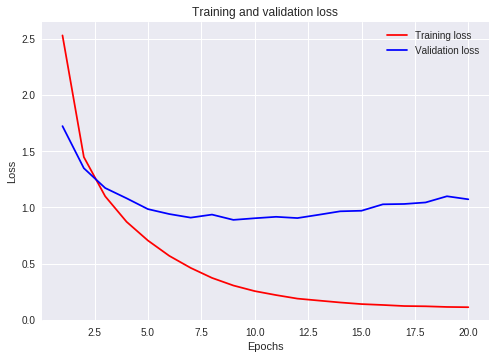

In [18]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

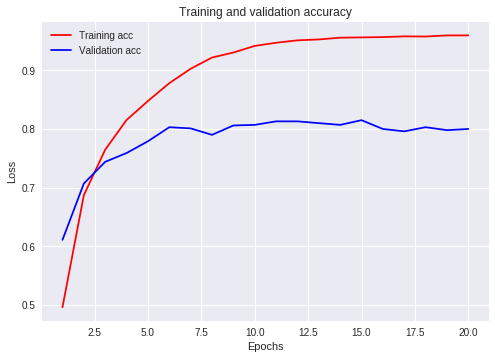

In [21]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 138us/step - loss: 2.5302 - acc: 0.5241 - val_loss: 1.6796 - val_acc: 0.6540
Epoch 2/9
7982/7982 [==============================] - 1s 133us/step - loss: 1.3718 - acc: 0.7127 - val_loss: 1.2792 - val_acc: 0.7250
Epoch 3/9
7982/7982 [==============================] - 1s 140us/step - loss: 1.0148 - acc: 0.7804 - val_loss: 1.1343 - val_acc: 0.7500
Epoch 4/9
7982/7982 [==============================] - 1s 141us/step - loss: 0.7988 - acc: 0.8252 - val_loss: 1.0538 - val_acc: 0.7570
Epoch 5/9
7982/7982 [==============================] - 1s 142us/step - loss: 0.6401 - acc: 0.8636 - val_loss: 0.9752 - val_acc: 0.7950
Epoch 6/9
7982/7982 [==============================] - 1s 138us/step - loss: 0.5123 - acc: 0.8924 - val_loss: 0.9102 - val_acc: 0.8140
Epoch 7/9
7982/7982 [==============================] - 1s 140us/step - loss: 0.4134 - acc: 0.9136 - val_loss: 0.8955 - val_acc: 0.8220
Epoch 8

7982/7982 [==============================] - 1s 139us/step - loss: 0.2798 - acc: 0.9372 - val_loss: 0.9381 - val_acc: 0.8010


In [23]:
results = model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 104us/step


In [24]:
results

[1.023188524127325, 0.7760463045944832]

In [0]:
predict = model.predict(x_test)

In [26]:
np.sum(predict[0])

1.0

In [27]:
np.argmax(predict[0])

3

In [28]:
type(predict)

numpy.ndarray

In [30]:
len(predict[0])

46

## Introducing a bottle neck

In [32]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 179us/step - loss: 3.1062 - acc: 0.1086 - val_loss: 2.4902 - val_acc: 0.2530
Epoch 2/20
7982/7982 [==============================] - 1s 176us/step - loss: 2.1157 - acc: 0.5117 - val_loss: 1.8017 - val_acc: 0.5580
Epoch 3/20
7982/7982 [==============================] - 2s 189us/step - loss: 1.6331 - acc: 0.5655 - val_loss: 1.5358 - val_acc: 0.6040
Epoch 4/20
7982/7982 [==============================] - 2s 192us/step - loss: 1.3864 - acc: 0.6290 - val_loss: 1.4336 - val_acc: 0.6210
Epoch 5/20
7982/7982 [==============================] - 2s 193us/step - loss: 1.2445 - acc: 0.6553 - val_loss: 1.3883 - val_acc: 0.6370
Epoch 6/20
7982/7982 [==============================] - 2s 189us/step - loss: 1.1469 - acc: 0.6937 - val_loss: 1.3805 - val_acc: 0.6560
Epoch 7/20
7982/7982 [==============================] - 2s 191us/step - loss: 1.0663 - acc: 0.7205 - val_loss: 1.3706 - val_acc: 0.6750


7982/7982 [==============================] - 2s 193us/step - loss: 0.9981 - acc: 0.7372 - val_loss: 1.3794 - val_acc: 0.6710
Epoch 9/20
7982/7982 [==============================] - 2s 195us/step - loss: 0.9379 - acc: 0.7521 - val_loss: 1.4172 - val_acc: 0.6850
Epoch 10/20
7982/7982 [==============================] - 2s 190us/step - loss: 0.8863 - acc: 0.7580 - val_loss: 1.4149 - val_acc: 0.6800
Epoch 11/20
7982/7982 [==============================] - 2s 193us/step - loss: 0.8419 - acc: 0.7669 - val_loss: 1.4764 - val_acc: 0.6670
Epoch 12/20
7982/7982 [==============================] - 2s 193us/step - loss: 0.8035 - acc: 0.7702 - val_loss: 1.4788 - val_acc: 0.6730
Epoch 13/20
7982/7982 [==============================] - 2s 194us/step - loss: 0.7673 - acc: 0.7730 - val_loss: 1.5099 - val_acc: 0.6740
Epoch 14/20
7982/7982 [==============================] - 2s 195us/step - loss: 0.7358 - acc: 0.7801 - val_loss: 1.5419 - val_acc: 0.6780
Epoch 15/20
4608/7982 [================>.............]

7982/7982 [==============================] - 2s 199us/step - loss: 0.7087 - acc: 0.7894 - val_loss: 1.5851 - val_acc: 0.6780
Epoch 16/20
7982/7982 [==============================] - 2s 196us/step - loss: 0.6835 - acc: 0.8002 - val_loss: 1.6729 - val_acc: 0.6800
Epoch 17/20
7982/7982 [==============================] - 2s 207us/step - loss: 0.6616 - acc: 0.8108 - val_loss: 1.7264 - val_acc: 0.6790
Epoch 18/20
7982/7982 [==============================] - 2s 196us/step - loss: 0.6384 - acc: 0.8206 - val_loss: 1.7265 - val_acc: 0.6780
Epoch 19/20
7982/7982 [==============================] - 2s 198us/step - loss: 0.6219 - acc: 0.8272 - val_loss: 1.7667 - val_acc: 0.6810
Epoch 20/20
7982/7982 [==============================] - 2s 205us/step - loss: 0.6036 - acc: 0.8346 - val_loss: 1.7994 - val_acc: 0.6790


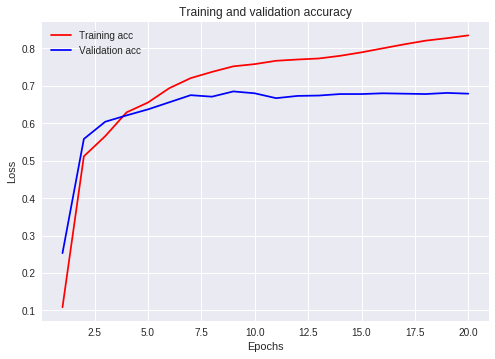

In [33]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()